# **AI News Summarizer using NLP**
---

### 🎯 **Objective**
Build a **lightweight news summarizer** using the **HuffPost News Category Dataset**.  
We willl apply **LexRank (extractive summarization)** to compress short descriptions into concise 2–3 line summaries.

---

### 🛠️ **Tech Stack**
-  Python  
-  pandas  
-  sumy (LexRank)
-  matplotlib 

---

### 📂 **Dataset**
📎 [Global News Dataset](https://www.kaggle.com/datasets/everydaycodings/global-news-dataset) 

---

In [39]:
# Importing standard libraries
import pandas as pd
import numpy as np

#  NLP tools from sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

In [16]:
# Load the dataset
df = pd.read_csv('/kaggle/input/global-news-dataset/data.csv')
df.head()
df.info

<bound method DataFrame.info of         article_id source_id                   source_name  \
0            89541       NaN  International Business Times   
1            89542       NaN                    Prtimes.jp   
2            89543       NaN                      VOA News   
3            89545       NaN            The Indian Express   
4            89547       NaN           The Times of Israel   
...            ...       ...                           ...   
105370      781108       NaN            The Indian Express   
105371      781129       NaN                        Forbes   
105372      781235       NaN                           NPR   
105373      781240       NaN                        Forbes   
105374      781308       NaN                        Forbes   

                                                   author  \
0                                          Paavan MATHEMA   
1                                                     NaN   
2              webdesk@voanews.com (Agen

In [18]:
# Drop missing values in full_content
df = df.dropna(subset=['full_content'])
# Filtering cells whose content is more than 300 characters
df = df[df['full_content'].str.len() > 300]
# Picking up 500 random articles from filtered data
df = df.sample(500, random_state=42,).reset_index(drop=True)
# Confirming by checking top 3 rows
df[['title', 'source_name', 'published_at', 'full_content']].head(3)

,title,source_name,published_at,full_content
0,Media names EU states against Ukrainian member...,RT,2023-11-18 14:51:14,Several EU member states are likely to resist ...
1,Global Automotive Chassis Strategic Market Rep...,GlobeNewswire,2023-11-13 10:48:00,"Dublin, Nov. 13, 2023 (GLOBE NEWSWIRE) -- Th..."
2,Valoe Corporation's Issue of New Shares Withou...,GlobeNewswire,2023-10-20 12:30:00.000000,Valoe Corporation Stock Exchang...


In [22]:
# Defining a function to summarize a given article using LexRank
def summarize_article(text,sentence_count=3):
    parser=PlaintextParser.from_string(text, Tokenizer('english'))
    summarizer = LexRankSummarizer()
    summary = summarizer(parser.document, sentence_count)
    return " ".join(str(sentence) for sentence in summary)

# Sumarrizing one article to confirm
sample_text = df.loc[0, 'full_content']
print("Title", df.loc[0, 'title'])
print("\nSummary:\n", summarize_article(sample_text))

Title Media names EU states against Ukrainian membership

Summary:
 Several EU member states are likely to resist the proposed accession of Ukraine to the union, media outlet EUObserver has reported, citing an unnamed diplomat. Kiev’s possible integration into the European bloc is set to be discussed by the 27 EU heads of government at a summit in Brussels in December, after the European Commission recommended this month that integration discussions should begin. But while the European Council is expected to back the plan, signs indicate that the process may receive pushback from several key member states, EUObserver said in a report on Thursday.


In [23]:
# Actual content for comparison
print(df.loc[0, 'full_content'])

Several EU member states are likely to resist the proposed accession of Ukraine to the union, media outlet EUObserver has reported, citing an unnamed diplomat. Kiev’s possible integration into the European bloc is set to be discussed by the 27 EU heads of government at a summit in Brussels in December, after the European Commission recommended this month that integration discussions should begin. But while the European Council is expected to back the plan, signs indicate that the process may receive pushback from several key member states, EUObserver said in a report on Thursday. “For sure, Austria will be obstructive [to Ukraine’s integration], but it will hide behind Hungary,”the publication said, citing comment from the anonymous EU diplomat.“Despite its new rhetoric, France doesn’t really want Ukraine in the EU and Germany is playing a cynical game.” Speaking in September, Austrian Chancellor Karl Nehammer rejected suggestions that Ukraine’s potential accession to the EU could be f

In [25]:
# Applying the code to the whole database
df['summary'] = df['full_content'].apply(lambda x: summarize_article(x))

# Displaying top 5 summaries alongside Titles
df[['title', 'summary']].head()

,title,summary
0,Media names EU states against Ukrainian member...,Several EU member states are likely to resist ...
1,Global Automotive Chassis Strategic Market Rep...,Global Automotive Chassis Market to Reach $92....
2,Valoe Corporation's Issue of New Shares Withou...,Valoe Corporation Stock Exchang...
3,Lao assembly rejects SEZ bill,By RFA Lao 2023.11.28 -- A draft law that soug...
4,Indian Army and BRO completes Chungthang Baile...,"Indian Army, BRO complete Chungthang Bailey Br..."


## 📈 **Comparison of Full Article vs. Summary Lengths (Top 100 Samples)**

This line graph visually compares the character lengths of original news articles (**Full Content**) and their corresponding summaries (**Summary**) using the **first 100 rows** of the dataset.

- 🔵 **Full Content** (Blue): Represents the raw, unprocessed article body.
- 🔴 **Summary** (Red): Shows the output of our LexRank-based summarizer.

> 🔍 **Observation:**  
> The summaries are consistently shorter than the full content, showcasing effective compression.  
> Occasional spikes in the blue line highlight longer articles, while the red line remains stable — proving that the summarizer scales efficiently regardless of input size.

📊 This visualization is a strong indicator of the summarizer’s performance, maintaining brevity without losing core information.


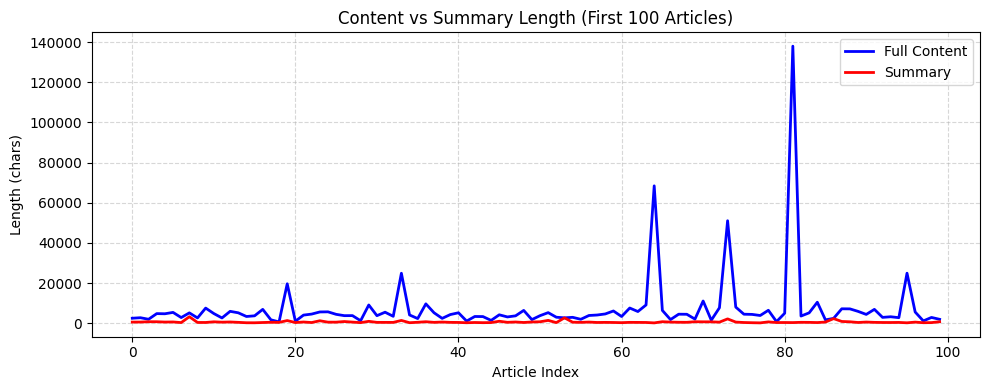

In [35]:
# Importing library for visual comparison
import matplotlib.pyplot as plt

# Calculating Lengths
df['content_length'] = df['full_content'].str.len()
df['summary_length'] = df['summary'].str.len()

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(df.index[:100], df['content_length'][:100], label='Full Content', color='blue', linewidth=2)
plt.plot(df.index[:100], df['summary_length'][:100], label='Summary', color='red', linewidth=2)
plt.title('Content vs Summary Length (First 100 Articles)')
plt.xlabel('Article Index')
plt.ylabel('Length (chars)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



### 📉 Compression Ratio Calculation

To quantify how much text was reduced, we computed a **compression ratio** for each article:

> **Compression Ratio = Summary Length / Full Content Length**

- Values closer to `0` → higher compression  
- Values near `1` → minimal or no compression  
- Rounded to `4` decimals for clarity 🧮

This gives a measurable indicator of how effective our summarization was across different articles.


In [38]:
# Avoid divide-by-zero
df['compression_ratio'] = df['summary_length'] / df['content_length']
df['compression_ratio'] = df['compression_ratio'].round(4)  # Round to 4 decimal places

# Preview
df[['content_length', 'summary_length', 'compression_ratio']].head()


,content_length,summary_length,compression_ratio
0,2503,586,0.2341
1,2753,601,0.2183
2,1990,762,0.3829
3,4799,752,0.1567
4,4725,599,0.1268


_📌 End of Notebook_  
Feel free to explore, and build on top of this!
